In [1]:
import wandb

api = wandb.Api()
runs = api.runs(path = 'yanyiphei/transformer_dropout_4', filters={"sweep": "jwsy06vy", "state": "finished"}, per_page = 23739)
len(runs)

23694

In [2]:
runs[0].created_at

'2024-03-29T15:37:11'

In [3]:
data_dict = [{"est_val_loss":run.summary_metrics['est_val_loss'],
              "loss": run.summary_metrics['loss'],
               "use_detached": int(run.config["model_config"]["learned_dropout_config"]["use_detached_x_in_dropout_mask"]),
               "created_at": run.created_at,
               } 
               for run in runs]
x = [d["created_at"] for d in data_dict]
y = [d["est_val_loss"] for d in data_dict]
z = [d["use_detached"] for d in data_dict]

In [4]:
trues = [i for i in z if i == 1]
len(trues), len(runs) - len(trues)

(11818, 11876)

Text(0, 0.5, 'Estimated Validation Loss')

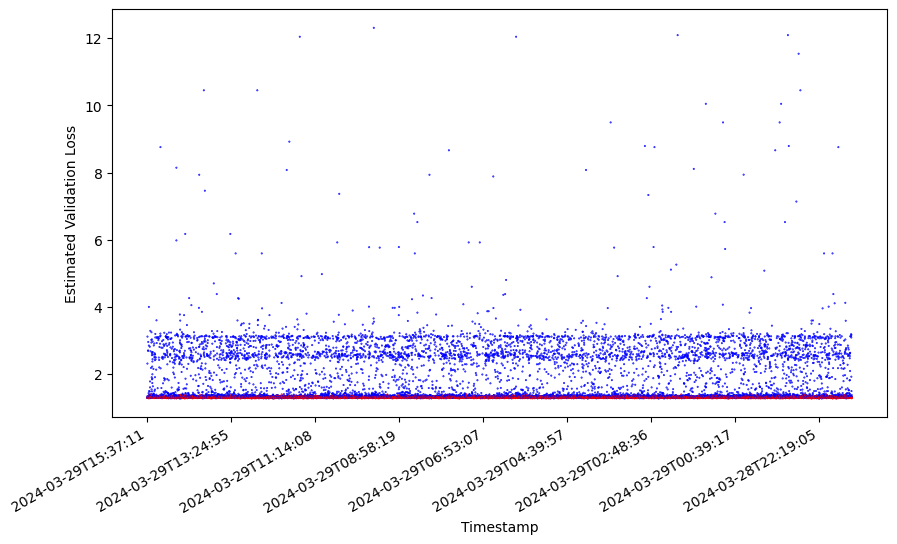

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

colors = ['red' if i == 1 else 'blue' for i in z]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, s = 0.2)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Auto-format the date labels for readability
plt.gcf().autofmt_xdate()


# Customizing the plot
plt.xlabel('Timestamp')
plt.ylabel('Estimated Validation Loss')
plt.title('Est val loss')

In [6]:
y = [d["loss"] for d in data_dict]

Text(0, 0.5, 'Estimated Validation Loss')

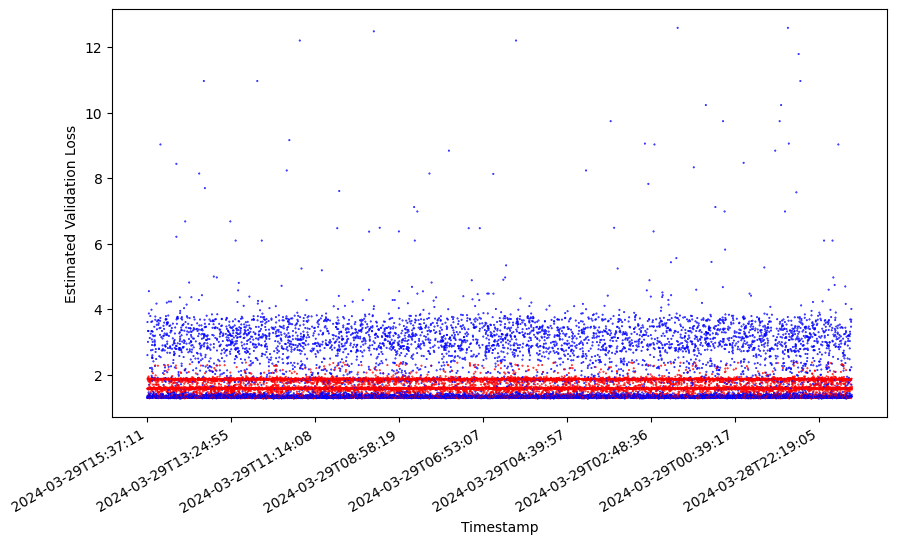

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

colors = ['red' if i == 1 else 'blue' for i in z]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, s = 0.2)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Auto-format the date labels for readability
plt.gcf().autofmt_xdate()


# Customizing the plot
plt.xlabel('Timestamp')
plt.ylabel('Loss')
plt.title('Loss')